# ESTI019 - Codificação de Sinais Multimídia
# Prova 2 b: Questão 6

6.Selecione um trecho de um fonema de uma vogal do seu nome e outro de uma vogal diferente do seu sobrenome com uma janela de Hamming de 40ms, fs=22050Hz e, calcule o espectro em magnitude (dBxfrequência) e sobreponha o espectro modelado LPC, comp=12.
Envie os arquivos gravados como seu nome e sobrenome.

a) (0,5) Plote as formas de onda analisadas (janeladas), os espectros delas e as envoltórias LPC de  cada espectro (dica,vejaoslide20)

b) (0,5) Forneça os coeficientes  LPC de ordem 12 e o ganhos de predição linear (resíduo do modelo, derivado de(4.2)) de cada análise.

In [1]:
!pip3 install audiolazy
import audiolazy as lz

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/UFABC2019/CSM/lab7")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import math

audio1 = 'BrunoSanchesRodrigues.wav'

print(audio1)
v1, sr1 = librosa.load(audio1)
print(type(v1), type(sr1))
print(v1.shape, sr1)
IPython.display.Audio(data=v1, rate=sr1)

BrunoSanchesRodrigues.wav
<class 'numpy.ndarray'> <class 'int'>
(89088,) 22050


Text(0.5, 1.0, 'Nome e Sobrenome Juntos, BrunoSanchesRodrigues.wav')

<Figure size 432x288 with 0 Axes>

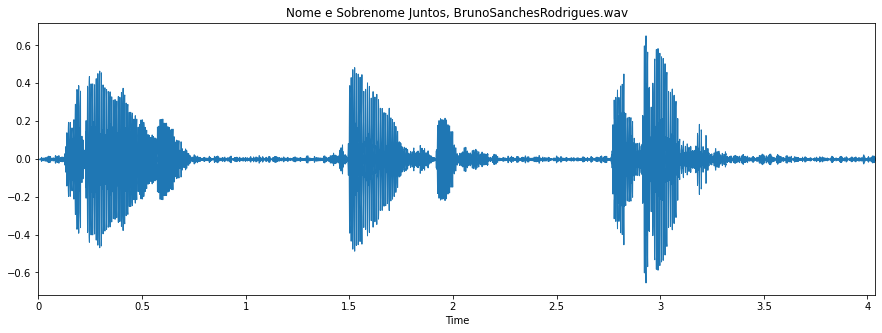

In [4]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveplot(v1, sr=sr1)
plt.title('Nome e Sobrenome Juntos, ' + audio1)

In [5]:
# Frequência de amostragem de 22050Hz
fa = sr1
print("Frequência de amostragem", fa)

# Janela de 40ms
Ts = 0.04
print("Janela de Hamming", Ts)

# Quantidade de amostras em cada segmento
Nj = int(Ts*fa)

# Número de segmentos
Nseg = int(len(v1)/Nj)

# Sobreposição de 50%
Nover = int(Nj*0.5)

Frequência de amostragem 22050
Janela de Hamming 0.04


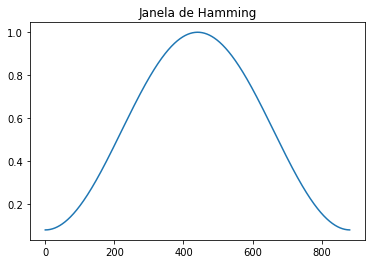

In [6]:
from scipy import signal

hm = signal.get_window('hamming', Nj)
plt.title("Janela de Hamming")
plt.plot(hm)

## Nome


<class 'numpy.ndarray'> <class 'int'>
(20000,) 22050


<Figure size 432x288 with 0 Axes>

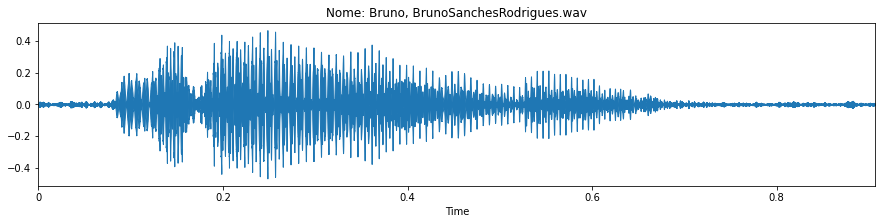

In [7]:
# Cortando o áudio
v11 = v1[1000:21000]

# Gráfico da amostra
plt.figure()
fig11, ax11 = plt.subplots(figsize=(15, 3))
librosa.display.waveplot(v11, sr=sr1)
plt.title('Nome: Bruno, ' + audio1)

# Informações sobre a amostra
print(type(v11), type(sr1))
print(v11.shape, sr1)

IPython.display.Audio(data=v11, rate=sr1)

Text(0.5, 1.0, 'Potência e Espectrograma Linear na Frequência, Nome: Bruno, BrunoSanchesRodrigues.wav')

<Figure size 864x576 with 0 Axes>

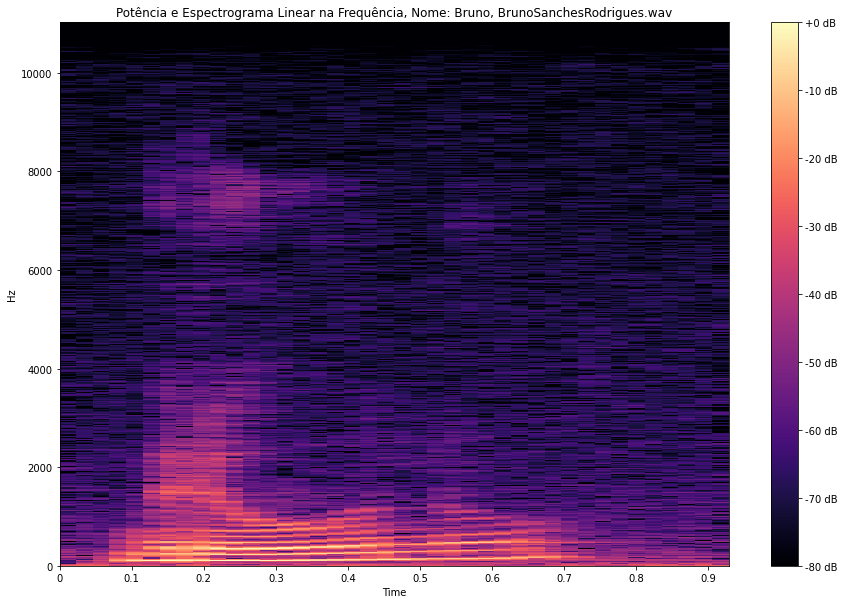

In [8]:
# Espectrograma Nome

plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v11)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência, Nome: Bruno, '+ audio1)

### Cálculo dos Parâmetros LPC, separação U/UV e Espectro + Envoltória LPC

Ordem do LPC 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, 'Energia por Segmento, Nome:Bruno')

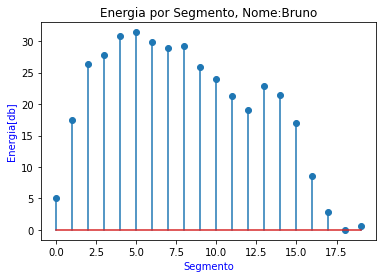

In [9]:
# Sobreposição em 50%
Nover = int(Nj*0.5)

# Número de segmentos
Nseg1 = int(len(v11)/Nj)

# P - Ordem do LPC
p = 12
print("Ordem do LPC", p)

# Energia de tempo curto
E = []

# Percorrer todos os segmentos
for l in range(1, Nseg1-1):
    # Multiplicar um trecho do áudio v1[a:b] pela janela de hamming (hm)
    xjan = v11[(l-1)*Nj+Nover : l*Nj+Nover] * hm
    
    # Elevar o resultado ao quadrado e dividir para encontrar a energia
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj

    E.append(aux)

# Energia em escala log (mostrar em unidade de dB)
E1 = 10*np.log10(E)

# Energia mínima
E1min = np.min(E1)
E1 = E1 - E1min   # Ruído de fundo em 0 dB

plt.stem(E1)
plt.ylabel('Energia[db]', color='b')
plt.xlabel('Segmento', color='b')  
plt.title("Energia por Segmento, Nome:Bruno")

Text(0.5, 1.0, "Segmento parte da vogal 'o', do Nome: Bruno")

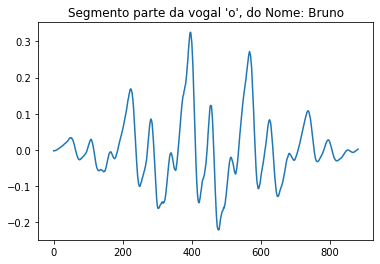

In [10]:
# Segmento parte da vogal 'o'
# Segmento 15 com 50% de sobreposição, i = (15+1)/2, 1 = 8

xj = v11[8*Nj : 9*Nj] * hm
plt.plot(xj)
plt.title("Segmento parte da vogal 'o', do Nome: Bruno")

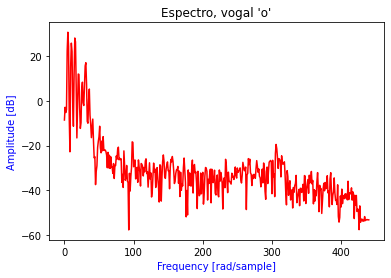

In [11]:
# Calcular a transformada de Fourier do segmento
sp = np.fft.fft(xj)

# Plot do espectro do módulo, em dB
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]', color='b')     
plt.title("Espectro, vogal 'o'")

plt.plot(20*np.log10(abs(sp[0:int(Nj/2)])), 'r')

In [12]:
# Coeficientes do filtro LPC

a_filter = lz.lpc.kautocor(xj, p)
print(a_filter)

1 - 1.74294 * z^-1 + 0.729981 * z^-2 - 0.773936 * z^-3 + 1.19861 * z^-4 - 0.619924 * z^-5 + 0.467988 * z^-6 - 0.253435 * z^-7 + 0.333601 * z^-8 - 0.398389 * z^-9 + 0.225053 * z^-10 - 0.470991 * z^-11 + 0.308014 * z^-12


In [13]:
# Erro predição = ganho do filtro [dB]:

gain_lpc = 10*np.log10(abs(a_filter.error))
print(gain_lpc)

-28.067330259280876


Text(0.5, 1.0, "Espectro e Envoltória LPC vogal, 'o'")

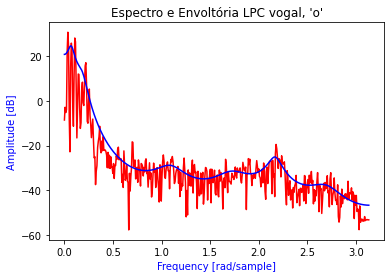

In [14]:
# Resposta em frequência do filtro
w, h = signal.freqz(1, a_filter.numerator, worN=int(Nj/2))

# Converter para dB e plotar
LP = 20 * np.log10(abs(h)) + gain_lpc

# Plot do espectro original
plt.plot(w, 20*np.log10(abs(sp[0:int(Nj/2)])), 'r')

# Plot da predição ordem 12
plt.plot(w, LP, 'b')

plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]', color='b')  
plt.title("Espectro e Envoltória LPC vogal, 'o'")

## Sobrenome

<class 'numpy.ndarray'> <class 'int'>
(15000,) 22050


<Figure size 432x288 with 0 Axes>

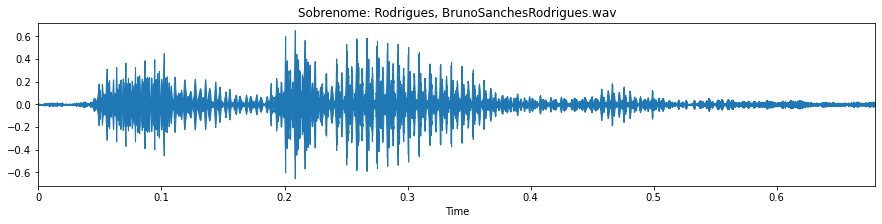

In [15]:
# Cortando o áudio
v11 = v1[60000:75000]

# Gráfico da amostra
plt.figure()
fig11, ax11 = plt.subplots(figsize=(15, 3))
librosa.display.waveplot(v11, sr=sr1)
plt.title('Sobrenome: Rodrigues, ' + audio1)

# Informações sobre a amostra
print(type(v11), type(sr1))
print(v11.shape, sr1)

IPython.display.Audio(data=v11, rate=sr1)

Text(0.5, 1.0, 'Potência e Espectrograma Linear na Frequência, Sobrenome: Rodrigues, BrunoSanchesRodrigues.wav')

<Figure size 864x576 with 0 Axes>

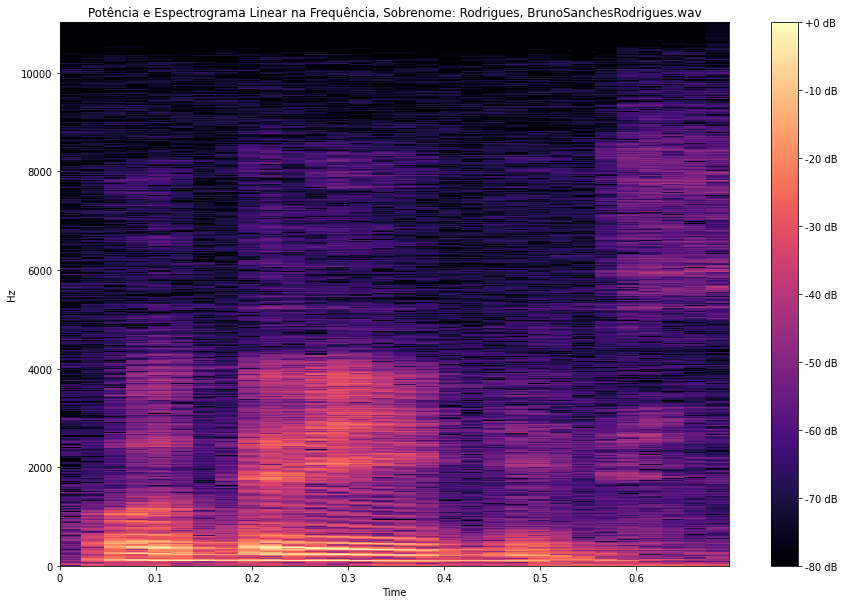

In [16]:
# Espectrograma Sobrenome

plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v11)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência, Sobrenome: Rodrigues, '+ audio1)

### Cálculo dos Parâmetros LPC, separação U/UV e Espectro + Envoltória LPC

Ordem do LPC 12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, 'Energia por Segmento, Sobrenome: Rodrigues')

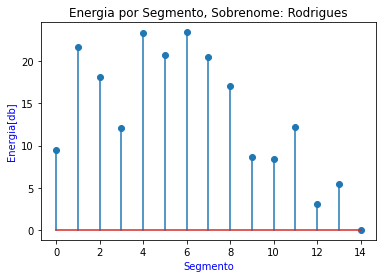

In [17]:
# Sobreposição em 50%
Nover = int(Nj*0.5)

# Número de segmentos
Nseg1 = int(len(v11)/Nj)

# P - Ordem do LPC
p = 12
print("Ordem do LPC", p)

# Energia de tempo curto
E = []

# Percorrer todos os segmentos
for l in range(1, Nseg1-1):
    # Multiplicar um trecho do áudio v1[a:b] pela janela de hamming (hm)
    xjan = v11[(l-1)*Nj+Nover : l*Nj+Nover] * hm
    
    # Elevar o resultado ao quadrado e dividir para encontrar a energia
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj

    E.append(aux)

# Energia em escala log (mostrar em unidade de dB)
E1 = 10*np.log10(E)

# Energia mínima
E1min = np.min(E1)
E1 = E1 - E1min   # Ruído de fundo em 0 dB

plt.stem(E1)
plt.ylabel('Energia[db]', color='b')
plt.xlabel('Segmento', color='b')  
plt.title("Energia por Segmento, Sobrenome: Rodrigues")

Text(0.5, 1.0, "Segmento parte da vogal 'e', do Sobrenome: Rodrigues")

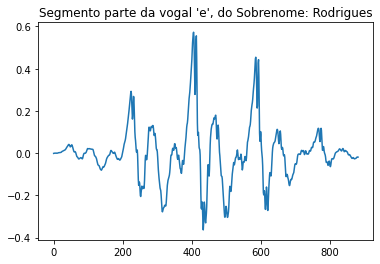

In [18]:
# Segmento parte da vogal 'e'
# Segmento 11 com 50% de sobreposição, i = (11+1)/2, 1 = 6

xj = v11[6*Nj : 7*Nj] * hm
plt.plot(xj)
plt.title("Segmento parte da vogal 'e', do Sobrenome: Rodrigues")

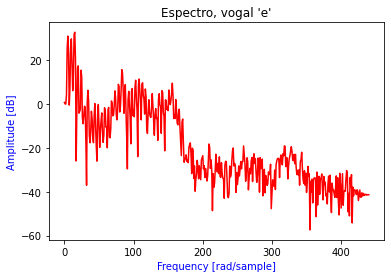

In [19]:
# Calcular a transformada de Fourier do segmento
sp = np.fft.fft(xj)

# Plot do espectro do módulo, em dB
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]', color='b')     
plt.title("Espectro, vogal 'e'")

plt.plot(20*np.log10(abs(sp[0:int(Nj/2)])), 'r')

In [20]:
# Coeficientes do filtro LPC

a_filter = lz.lpc.kautocor(xj, p)
print(a_filter)

1 - 2.73464 * z^-1 + 3.21145 * z^-2 - 2.0586 * z^-3 + 1.15826 * z^-4 - 1.61241 * z^-5 + 1.82681 * z^-6 - 0.9111 * z^-7 - 0.0688912 * z^-8 + 0.163063 * z^-9 + 0.0547406 * z^-10 - 0.0355625 * z^-11 + 0.0229506 * z^-12


In [21]:
# Erro predição = ganho do filtro [dB]:

gain_lpc = 10*np.log10(abs(a_filter.error))
print(gain_lpc)

-15.89919510061664


Text(0.5, 1.0, "Espectro e Envoltória LPC vogal, 'e'")

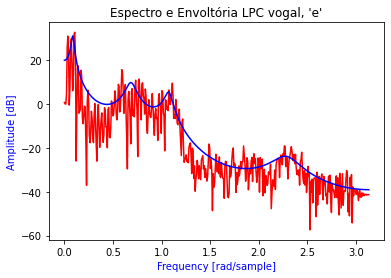

In [22]:
# Resposta em frequência do filtro
w, h = signal.freqz(1, a_filter.numerator, worN=int(Nj/2))

# Converter para dB e plotar
LP = 20 * np.log10(abs(h)) + gain_lpc

# Plot do espectro original
plt.plot(w, 20*np.log10(abs(sp[0:int(Nj/2)])), 'r')

# Plot da predição ordem 12
plt.plot(w, LP, 'b')

plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]', color='b')  
plt.title("Espectro e Envoltória LPC vogal, 'e'")